In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Matplotlib is building the font cache; this may take a moment.


In [2]:
%matplotlib inline

In [3]:
data = load_iris()

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = pd.DataFrame(data=np.c_[data.data,data.target],columns=[list(data.feature_names)+['target']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# see the shape
df.shape

(150, 5)

In [7]:
df.target.value_counts()

(target,)
0.0          50
1.0          50
2.0          50
dtype: int64

In [8]:
# Check null value
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
# Change the columns name
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']

In [10]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


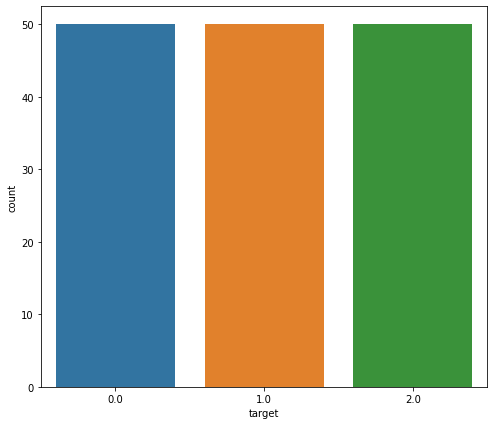

In [11]:
# target labels visualization using seaborn
plt.figure(figsize=(8,7))
sns.countplot(data=df,x='target')
plt.show()

In [12]:
# Check the correlation
df_corr = df.corr()['target'][:-1]
df_corr

sepal_length    0.782561
sepal_width    -0.426658
petal_length    0.949035
petal_width     0.956547
Name: target, dtype: float64

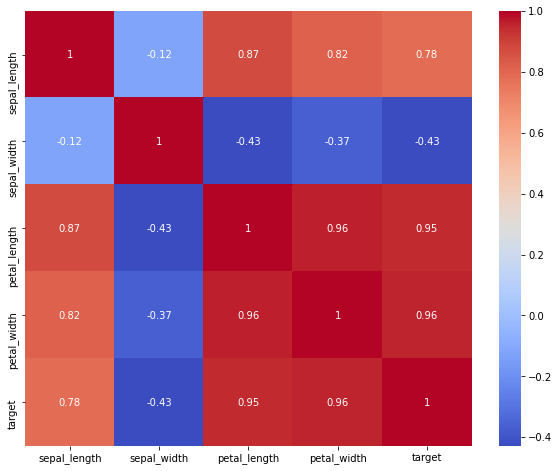

In [13]:
# Check the correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm')
plt.show()

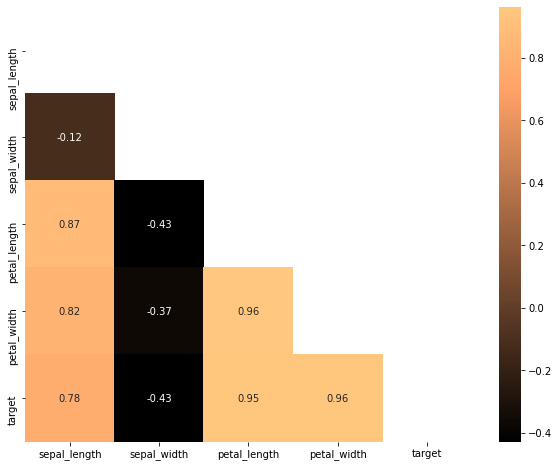

In [14]:
# Another way to see only lower triangle
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
matrix = np.triu(corr_matrix)
sns.heatmap(data=corr_matrix,annot=True,mask=matrix,cmap=plt.cm.copper)
plt.show()

In [15]:
df_cols = [col for col in df.columns][:-1]
df_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<Figure size 576x504 with 0 Axes>

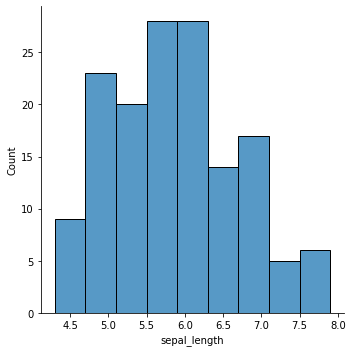

<Figure size 576x504 with 0 Axes>

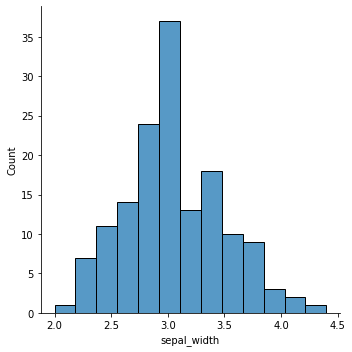

<Figure size 576x504 with 0 Axes>

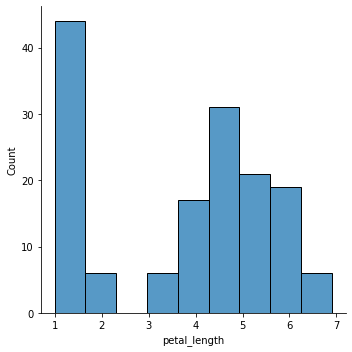

<Figure size 576x504 with 0 Axes>

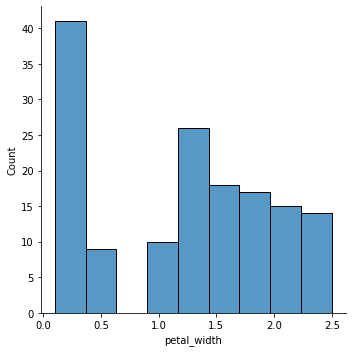

In [16]:
# Check the data distrubation
for col in df_cols:
    plt.figure(figsize=(8,7))
    sns.displot(data=df,x=col)
    plt.show()

<Figure size 576x504 with 0 Axes>

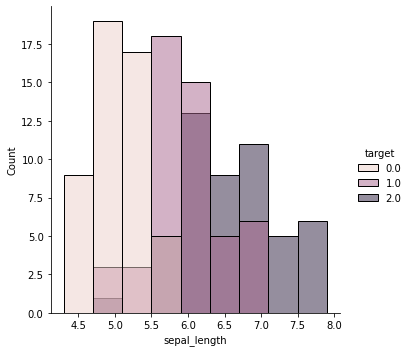

<Figure size 576x504 with 0 Axes>

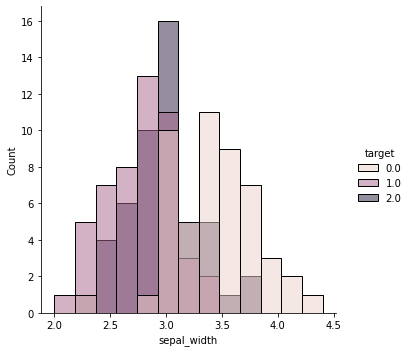

<Figure size 576x504 with 0 Axes>

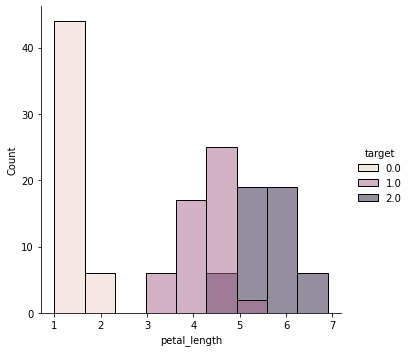

<Figure size 576x504 with 0 Axes>

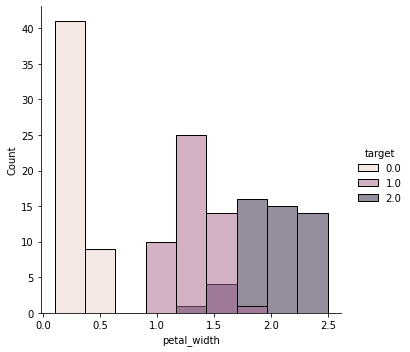

In [17]:
# check the data distrubation respect to target
for col in df_cols:
    plt.figure(figsize=(8,7))
    sns.displot(data=df,x=col,hue='target')
    plt.show()

## Split the features and label

In [18]:
features = df.iloc[:,:-1]
label = df.target

In [19]:
features.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [20]:
label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Split in train and test set

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(features,label,test_size=0.2,random_state=1)

In [22]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [23]:
print(f"xtrain shape: {xtrain.shape}")
print(f"xtrain shape: {xtest.shape}")
print(f"xtrain shape: {ytrain.shape}")
print(f"xtrain shape: {ytest.shape}")

xtrain shape: (120, 4)
xtrain shape: (30, 4)
xtrain shape: (120,)
xtrain shape: (30,)


In [24]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(features,label,test_size=0.2,random_state=1)

In [25]:
xtrain2.head(2)

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3


In [26]:
ytrain2.head(2)

91     1.0
135    2.0
Name: target, dtype: float64

### Scaling the test data

In [27]:
scale = StandardScaler()

In [28]:
xtrain = scale.fit_transform(X= xtrain)
xtest = scale.transform(X= xtest)

In [29]:
xtrain

array([[ 0.31553662, -0.04578885,  0.44767531,  0.23380268],
       [ 2.2449325 , -0.04578885,  1.29769171,  1.39742892],
       [-0.2873996 , -1.24028061,  0.05100098, -0.15407273],
       [ 0.67729835, -0.52358555,  1.01435291,  1.13884531],
       [-0.04622511, -0.52358555,  0.73101411,  1.52672073],
       [-0.64916132,  1.62649961, -1.30902526, -1.31769898],
       [-0.40798684, -1.71807731,  0.10766874,  0.10451088],
       [-0.76974857,  0.90980456, -1.36569302, -1.31769898],
       [ 0.79788559, -0.52358555,  0.44767531,  0.36309449],
       [ 1.03906007, -1.24028061,  1.12768843,  0.7509699 ],
       [ 1.15964732, -0.04578885,  0.95768515,  1.13884531],
       [-0.89033581,  1.14870291, -1.36569302, -1.18840717],
       [ 0.19494938, -1.95697567,  0.67434635,  0.36309449],
       [ 0.5567111 , -0.2846872 ,  1.01435291,  0.7509699 ],
       [ 0.91847283, -0.2846872 ,  0.44767531,  0.10451088],
       [ 2.2449325 , -1.00138226,  1.75103379,  1.39742892],
       [-0.16681235,  1.

In [30]:
# another way to scaling
col_names = ['sepal_length','sepal_width','petal_length','petal_width']
new_features = features[col_names]

In [31]:
new_features.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [32]:
scale2 = StandardScaler()

In [33]:
new_features[col_names] = scale2.fit_transform(new_features.values)

In [34]:
new_features.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444


### Model selection
Without scaling

In [35]:
model_params = {
    'svm' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,3,10,20],
            'kernel' : ['rbf','linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10,20,100,150]
        }
    },
    'neighbors' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,10,15],
            'leaf_size' : [15,20,30]
        }
    }
}

In [36]:
scores = []

for model_name, model in model_params.items():
    clf = GridSearchCV(estimator= model['model'], param_grid= model['params'],cv=5,n_jobs=-1)
    clf.fit(xtrain2,ytrain2)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [37]:
model_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_df

,model,best_score,best_params
0,svm,0.983333,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.941667,{'n_estimators': 150}
2,neighbors,0.966667,"{'leaf_size': 15, 'n_neighbors': 15}"


### Model selection with scaling

In [38]:
scores2 = []

for model_name, model in model_params.items():
    clf = GridSearchCV(estimator= model['model'], param_grid= model['params'],cv=5,n_jobs=-1)
    clf.fit(xtrain,ytrain)
    scores2.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [39]:
model_df2 = pd.DataFrame(scores2,columns=['model','best_score','best_params'])
model_df2

,model,best_score,best_params
0,svm,0.975000,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.933333,{'n_estimators': 20}
2,neighbors,0.950000,"{'leaf_size': 15, 'n_neighbors': 15}"


### Selected best Model

In [40]:
svc_model = SVC(gamma='auto',C=1,kernel='linear')

In [41]:
svc_model.fit(xtrain2,ytrain2)

SVC(C=1, gamma='auto', kernel='linear')

In [42]:
svc_model.score(xtest2,ytest2)

1.0

In [43]:
svc_model.score(xtrain2,ytrain2)

0.9833333333333333

### Now apply cross validation over the data that are without scale

In [44]:
cross_val_score = cross_val_score(estimator=svc_model,X= features,y=label,cv=5,scoring='accuracy',n_jobs=-1)

In [45]:
cross_val_score.mean()

0.9800000000000001

In [46]:
y_pred = svc_model.predict(X=xtest2)
y_pred

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 2., 1., 0., 0., 1., 2.])

In [47]:
# see confusion matrix

confusion_mat = confusion_matrix(ytest2,y_pred)
confusion_mat

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [48]:
import pickle

In [49]:
# pickle.dump(svc_model,open('best_model.pkl','wb'))

In [50]:
test_model = pickle.load(open('best_model.pkl','rb'))

In [51]:
lis = [5.6,3.7,1.8,0.4]

test_model.predict([lis])

array([0.])

In [52]:
a = {'num':int(1.0)}
a

{'num': 1}

In [53]:
xtest2.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [54]:
ytest2.head()

14     0.0
98     1.0
75     1.0
16     0.0
131    2.0
Name: target, dtype: float64